# Description

Generates the figure for top cell types for a specified LV (in Settings section below).

# Modules loading

In [1]:
import re
from pathlib import Path

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from data.recount2 import LVAnalysis
from utils import chunker
import conf

# Settings

In [2]:
LV_NAME = "LV70"

In [3]:
LV_AXIS_THRESHOLD = None  # 3.0
N_TOP_SAMPLES = 400
N_TOP_ATTRS = 15

In [4]:
# OUTPUT_FIGURES_DIR = Path(
#     conf.MANUSCRIPT["FIGURES_DIR"], "lvs_analysis", f"{LV_NAME.lower()}"
# ).resolve()
# display(OUTPUT_FIGURES_DIR)
# OUTPUT_FIGURES_DIR.mkdir(parents=True, exist_ok=True)

In [5]:
# OUTPUT_CELL_TYPE_FILEPATH = OUTPUT_FIGURES_DIR / f"{LV_NAME.lower()}-cell_types.svg"
# display(OUTPUT_CELL_TYPE_FILEPATH)

# Load MultiPLIER summary

In [6]:
multiplier_model_summary = pd.read_pickle(conf.MULTIPLIER["MODEL_SUMMARY_FILE"])

In [7]:
multiplier_model_summary.shape

(2157, 5)

In [8]:
multiplier_model_summary.head()

,pathway,LV index,AUC,p-value,FDR
1,KEGG_LYSINE_DEGRADATION,1,0.388059,0.866078,0.956005
2,REACTOME_MRNA_SPLICING,1,0.733057,0.000048,0.000582
3,MIPS_NOP56P_ASSOCIATED_PRE_RRNA_COMPLEX,1,0.680555,0.001628,0.011366
4,KEGG_DNA_REPLICATION,1,0.549473,0.312155,0.539951
5,PID_MYC_ACTIVPATHWAY,1,0.639303,0.021702,0.083739


# Load data

## Original data

In [9]:
# INPUT_SUBSET = "z_score_std"

In [10]:
# INPUT_STEM = "projection-smultixcan-efo_partial-mashr-zscores"

In [11]:
# input_filepath = Path(
#     conf.RESULTS["DATA_TRANSFORMATIONS_DIR"],
#     INPUT_SUBSET,
#     f"{INPUT_SUBSET}-{INPUT_STEM}.pkl",
# ).resolve()
# display(input_filepath)

# assert input_filepath.exists(), "Input file does not exist"

# input_filepath_stem = input_filepath.stem
# display(input_filepath_stem)

In [12]:
# data = pd.read_pickle(input_filepath)

In [13]:
# data.shape

In [14]:
# data.head()

## LV data

In [15]:
# lv_obj = LVAnalysis(LV_NAME, data)
lv_obj = LVAnalysis(LV_NAME)

In [16]:
multiplier_model_summary[
    multiplier_model_summary["LV index"].isin((LV_NAME[2:],))
    & (
        (multiplier_model_summary["FDR"] < 0.05)
        | (multiplier_model_summary["AUC"] >= 0.75)
    )
]

,pathway,LV index,AUC,p-value,FDR
334,REACTOME_REGULATION_OF_ORNITHINE_DECARBOXYLASE...,70,0.993153,7.452321e-08,0.000002
335,REACTOME_CDK_MEDIATED_PHOSPHORYLATION_AND_REMO...,70,0.904858,8.053509e-06,0.000119
336,MIPS_PA700_20S_PA28_COMPLEX,70,0.992106,1.885207e-06,0.000032
337,KEGG_PATHOGENIC_ESCHERICHIA_COLI_INFECTION,70,0.800101,6.946959e-04,0.005698
340,REACTOME_TRNA_AMINOACYLATION,70,0.781157,2.372363e-03,0.015158


In [17]:
lv_data = lv_obj.get_experiments_data()

SRP055569, SRP059035, SRP033135, SRP042161, SRP064464, SRP055810, SRP015449, SRP014428, SRP059775, SRP018838, SRP060416, SRP026537, SRP012461, SRP044206, SRP058773, SRP050992, SRP063840, SRP059732, SRP055153, SRP061207, SRP002605, SRP030617, SRP066834, SRP057196, SRP011578, SRP009266, 

/opt/code/libs/data/recount2.py:360: UserWarning: Not all experiments data could be loaded (25 != 26)
  warnings.warn(


In [18]:
lv_data.shape

(5787, 48)

In [19]:
lv_data.head()

cell type cell line  \
project   run                                                      
SRP055569 SRR1821717  MCF10a human breast cancer cells       NaN   
          SRR1821716  MCF10a human breast cancer cells       NaN   
          SRR1821715  MCF10a human breast cancer cells       NaN   
          SRR1821714  MCF10a human breast cancer cells       NaN   
          SRR1821713  MCF10a human breast cancer cells       NaN   

                     hour post serum-switch debris control well cells in well  \
project   run                                                                   
SRP055569 SRR1821717                    NaN    NaN          NaN           NaN   
          SRR1821716                    NaN    NaN          NaN           NaN   
          SRR1821715                    NaN    NaN          NaN           NaN   
          SRR1821714                    NaN    NaN          NaN           NaN   
          SRR1821713                    NaN    NaN          NaN           NaN   

                     library protocol patient id subtype assigned cell type  \
project   run                                                                 
SRP055569 SRR1821717              NaN        NaN     NaN                NaN   
          SRR1821716              NaN        NaN     NaN                NaN   
          SRR1821715              NaN        NaN     NaN                NaN   
          SRR1821714              NaN        NaN     NaN                NaN   
          SRR1821713              NaN        NaN     NaN                NaN   

                      ... transfection time cdna synthesis method  \
project   run         ...                                           
SRP055569 SRR1821717  ...          NaN  NaN                   NaN   
          SRR1821716  ...          NaN  NaN                   NaN   
          SRR1821715  ...          NaN  NaN                   NaN   
          SRR1821714  ...          NaN  NaN                   NaN   
          SRR1821713  ...          NaN  NaN                   NaN   

                     library construction method Stage  age c1 chip id  \
project   run                                                            
SRP055569 SRR1821717                         NaN   NaN  NaN        NaN   
          SRR1821716                         NaN   NaN  NaN        NaN   
          SRR1821715                         NaN   NaN  NaN        NaN   
          SRR1821714                         NaN   NaN  NaN        NaN   
          SRR1821713                         NaN   NaN  NaN        NaN   

                     experiment_sample_name knockdown      LV70  
project   run                                                    
SRP055569 SRR1821717                    NaN       NaN -0.140719  
          SRR1821716                    NaN       NaN  0.023890  
          SRR1821715                    NaN       NaN -0.064646  
          SRR1821714                    NaN       NaN  0.044480  
          SRR1821713                    NaN       NaN  0.013533  

[5 rows x 48 columns]

# LV cell types analysis

## Get top attributes

In [20]:
lv_attrs = lv_obj.get_attributes_variation_score()
display(lv_attrs.head(20))

genotype                  0.063554
disease status            0.027813
developmental stage       0.019516
embryo number             0.019516
lineage                   0.019516
knockdown                 0.019486
cell type                 0.015602
cells in well             0.013216
hour post serum-switch    0.013216
debris                    0.013216
control well              0.013216
library protocol          0.013216
patient id                0.012070
time                      0.010868
transfection              0.010868
treatment                 0.010574
cell line                 0.010185
labexpid                  0.010009
ercc_dilution             0.009695
qc pass                   0.009695
dtype: float64

In [21]:
# show those with cell type or tissue in their name
_tmp = pd.Series(lv_attrs.index)
lv_attrs[
    _tmp.str.match(
        "(?:cell.+type$)|(?:tissue$)|(?:tissue.+type$)",
        case=False,
        flags=re.IGNORECASE,
    ).values
].sort_values(ascending=False)

cell type    0.015602
tissue       0.005668
dtype: float64

In [22]:
_tmp = lv_data.loc[
    :,
    [
        "cell type",
        "tissue",
        LV_NAME,
    ],
]

In [23]:
_tmp_seq = list(chunker(_tmp.sort_values(LV_NAME, ascending=False), 25))

In [27]:
_tmp_seq[2]

cell type  \
project   run                                                             
SRP059035 SRR2049458                                                PDX   
          SRR2049506                                                PDX   
SRP055569 SRR2019190  mixture of U87 human glioma cells and WI-38 hu...   
SRP059035 SRR2049454                                                PDX   
          SRR2049467                                                PDX   
SRP042161 SRR1294531                                       Glioblastoma   
SRP055810 SRR1825957                                                NaN   
SRP059035 SRR2049449                                                PDX   
          SRR2049457                                                PDX   
          SRR2049475                                                PDX   
SRP055810 SRR1825959                                                NaN   
SRP055569 SRR2018976  mixture of U87 human glioma cells and MCF10a h...   
SRP059035 SRR2049446                                                PDX   
          SRR2049434                                                PDX   
          SRR2049465                                                PDX   
          SRR2049536                                                PDX   
          SRR2049441                                                PDX   
SRP018838 SRR1066641                                                NaN   
SRP033135 SRR1033116             Human Skeletal Muscle Myoblasts (HSMM)   
SRP014428 SRR522114                                                 NaN   
SRP033135 SRR1033079             Human Skeletal Muscle Myoblasts (HSMM)   
SRP055569 SRR1821671                   MCF10a human breast cancer cells   
SRP055810 SRR1825969                                                NaN   
SRP059035 SRR2049486                                                PDX   
SRP042161 SRR1294937                                       Glioblastoma   

                     tissue      LV70  
project   run                          
SRP059035 SRR2049458    NaN  0.415734  
          SRR2049506    NaN  0.415595  
SRP055569 SRR2019190    NaN  0.413804  
SRP059035 SRR2049454    NaN  0.413536  
          SRR2049467    NaN  0.412642  
SRP042161 SRR1294531    NaN  0.412572  
SRP055810 SRR1825957    NaN  0.410584  
SRP059035 SRR2049449    NaN  0.410435  
          SRR2049457    NaN  0.410235  
          SRR2049475    NaN  0.409084  
SRP055810 SRR1825959    NaN  0.407287  
SRP055569 SRR2018976    NaN  0.406025  
SRP059035 SRR2049446    NaN  0.404930  
          SRR2049434    NaN  0.404397  
          SRR2049465    NaN  0.404306  
          SRR2049536    NaN  0.401490  
          SRR2049441    NaN  0.400980  
SRP018838 SRR1066641    NaN  0.400519  
SRP033135 SRR1033116    NaN  0.398639  
SRP014428 SRR522114     NaN  0.397468  
SRP033135 SRR1033079    NaN  0.395488  
SRP055569 SRR1821671    NaN  0.395300  
SRP055810 SRR1825969    NaN  0.392428  
SRP059035 SRR2049486    NaN  0.391084  
SRP042161 SRR1294937    NaN  0.389817

In [28]:
# what is there in these projects?
lv_data.loc[["SRP064464"]].dropna(how="all", axis=1).sort_values(
    LV_NAME, ascending=False
).sort_values(LV_NAME, ascending=False).head(10)

assigned cell type qc pass cell count ercc_mix  \
project   run                                                         
SRP064464 SRR2558170                 NA   FALSE          1     mix2   
          SRR2558120               duct    TRUE          1     mix2   
          SRR2558132               duct    TRUE          1     mix2   
          SRR2558136              alpha    TRUE          1     mix2   
          SRR2558134               duct    TRUE          1     mix2   
          SRR2558150               duct    TRUE          1     mix2   
          SRR2558173               beta    TRUE          1     mix2   
          SRR2558179               beta    TRUE          1     mix2   
          SRR2558129              alpha    TRUE          1     mix2   
          SRR2558171              alpha    TRUE          1     mix2   

                     ercc_dilution      LV70  
project   run                                 
SRP064464 SRR2558170       1000000  0.570969  
          SRR2558120       1000000  0.350524  
          SRR2558132       1000000  0.253358  
          SRR2558136       1000000  0.252578  
          SRR2558134       1000000  0.248287  
          SRR2558150       1000000  0.234209  
          SRR2558173       1000000  0.225235  
          SRR2558179       1000000  0.220873  
          SRR2558129       1000000  0.210585  
          SRR2558171       1000000  0.209975

In [29]:
SELECTED_ATTRIBUTE = "cell type"

In [30]:
# it has to be in the order desired for filling nans in the SELECTED_ATTRIBUTE
SECOND_ATTRIBUTES = ["tissue"]

## Get plot data

In [31]:
plot_data = lv_data.loc[:, [SELECTED_ATTRIBUTE] + SECOND_ATTRIBUTES + [LV_NAME]]

In [32]:
# if blank/nan, fill cell type column with tissue content
_new_column = plot_data[[SELECTED_ATTRIBUTE] + SECOND_ATTRIBUTES].fillna(
    method="backfill", axis=1
)[SELECTED_ATTRIBUTE]
plot_data[SELECTED_ATTRIBUTE] = _new_column
plot_data = plot_data.drop(columns=SECOND_ATTRIBUTES)
plot_data = plot_data.fillna({SELECTED_ATTRIBUTE: "NOT CATEGORIZED"})
# plot_data = plot_data.dropna(subset=[SELECTED_ATTRIBUTE])

In [33]:
plot_data = plot_data.sort_values(LV_NAME, ascending=False)

In [34]:
plot_data.head(20)

,,cell type,LV70
project,run,,
SRP055569,SRR2019129,mixture of U87 human glioma cells and WI-38 hu...,0.995904
SRP059035,SRR2049471,PDX,0.744517
SRP033135,SRR1033274,Human Skeletal Muscle Myoblasts (HSMM),0.602396
SRP042161,SRR1294542,Glioblastoma,0.597381
SRP033135,SRR1033195,Human Skeletal Muscle Myoblasts (HSMM),0.575768
SRP064464,SRR2558170,NOT CATEGORIZED,0.570969
SRP059035,SRR2049451,PDX,0.565731
SRP055569,SRR2018983,mixture of U87 human glioma cells and MCF10a h...,0.545885
SRP042161,SRR1294622,Glioblastoma,0.515310


## Customize x-axis values

When cell type values are not very clear, customize their names by looking at their specific studies to know exactly what the authors meant.

In [35]:
final_plot_data = plot_data.replace(
    {
        SELECTED_ATTRIBUTE: {
            # "normal skin": "Skin",
            # "liver": "Liver",
            # "Human Skeletal Muscle Myoblasts (HSMM)": "Skeletal muscle myoblasts",
            # "astrocytes": "Astrocytes",
            # "mixture of U87 human glioma cells and MCF10a human breast cancer cells": "Glioma + MCF10 breast cancer cells",
            # "mixture of U87 human glioma cells and WI-38 human lung fibroblast cells": "Glioma + WI-38 lung fibroblast cells",
            # "functional hepatocytes generated by lineage reprogramming": "Hepatocytes",
            # "human adipose-derived stem cells": "Adipose-derived stem cells",
            # "adipose": "Adipose",
            # "embryonic stem cells": "Embryonic stem cells",
            # "primary keratinocytes": "Primary keratinocytes",
            # "fetal liver": "Fetal liver",
            # "in vitro differentiated erythroid cells": "Erythroid cells",
            # "WAT": "White adipose tissue",
            # "BAT": "Brown adipose tissue",
            # "Uninvolved Breast Tissue Adjacent to ER+ Primary Tumor": "Breast tissue adjacent to ER+ tumor",
            # "ovarian granulosa cells": "Ovarian granulosa cells",
        }
    }
)

In [36]:
# sorte index to avoid PerformanceWarning from pandas
final_plot_data = final_plot_data.sort_index()

In [37]:
# _srp_code = "SRP060416"
# _tmp = final_plot_data.loc[(_srp_code,)].apply(
#     lambda x: x[SELECTED_ATTRIBUTE]
#     + f" ({lv_data.loc[(_srp_code, x.name), 'facs gating']})",
#     axis=1,
# )
# final_plot_data.loc[(_srp_code, _tmp.index), SELECTED_ATTRIBUTE] = _tmp.values

In [38]:
# # take the top samples only
# final_plot_data = final_plot_data.sort_values(LV_NAME, ascending=False)[:N_TOP_SAMPLES]

## Threshold LV values

In [39]:
if LV_AXIS_THRESHOLD is not None:
    final_plot_data.loc[
        final_plot_data[LV_NAME] > LV_AXIS_THRESHOLD, LV_NAME
    ] = LV_AXIS_THRESHOLD

## Delete samples with no tissue/cell type information

In [40]:
# final_plot_data = final_plot_data[
#     final_plot_data[SELECTED_ATTRIBUTE] != "NOT CATEGORIZED"
# ]

## Set x-axis order

In [41]:
attr_order = (
    final_plot_data.groupby(SELECTED_ATTRIBUTE)
    .median()
    .sort_values(LV_NAME, ascending=False)
    .index[:N_TOP_ATTRS]
    .tolist()
)

In [42]:
len(attr_order)

15

In [43]:
attr_order[:5]

['n-tert keratinocytes',
 'PDX',
 'Differentiated Glioma Cell Line',
 'NG2-sorted cell from blood of melanoma patient',
 'human embryonic stem cells']

## Plot

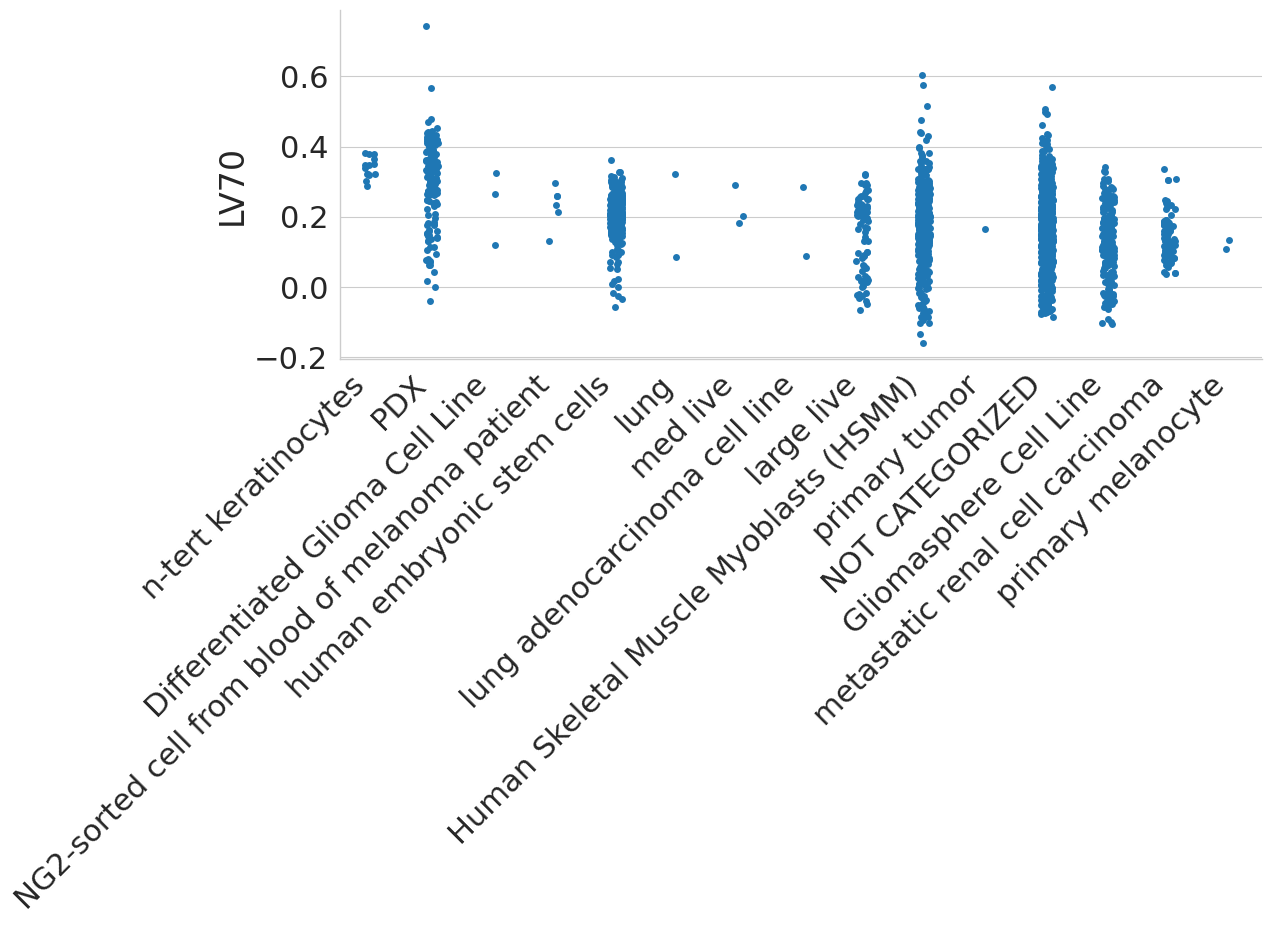

In [44]:
with sns.plotting_context("paper", font_scale=2.5), sns.axes_style("whitegrid"):
    g = sns.catplot(
        data=final_plot_data,
        y=LV_NAME,
        x=SELECTED_ATTRIBUTE,
        order=attr_order,
        kind="strip",
        height=5,
        aspect=2.5,
    )
    plt.xticks(rotation=45, horizontalalignment="right")
    plt.xlabel("")

    # plt.savefig(
    #     OUTPUT_CELL_TYPE_FILEPATH,
    #     bbox_inches="tight",
    #     facecolor="white",
    # )

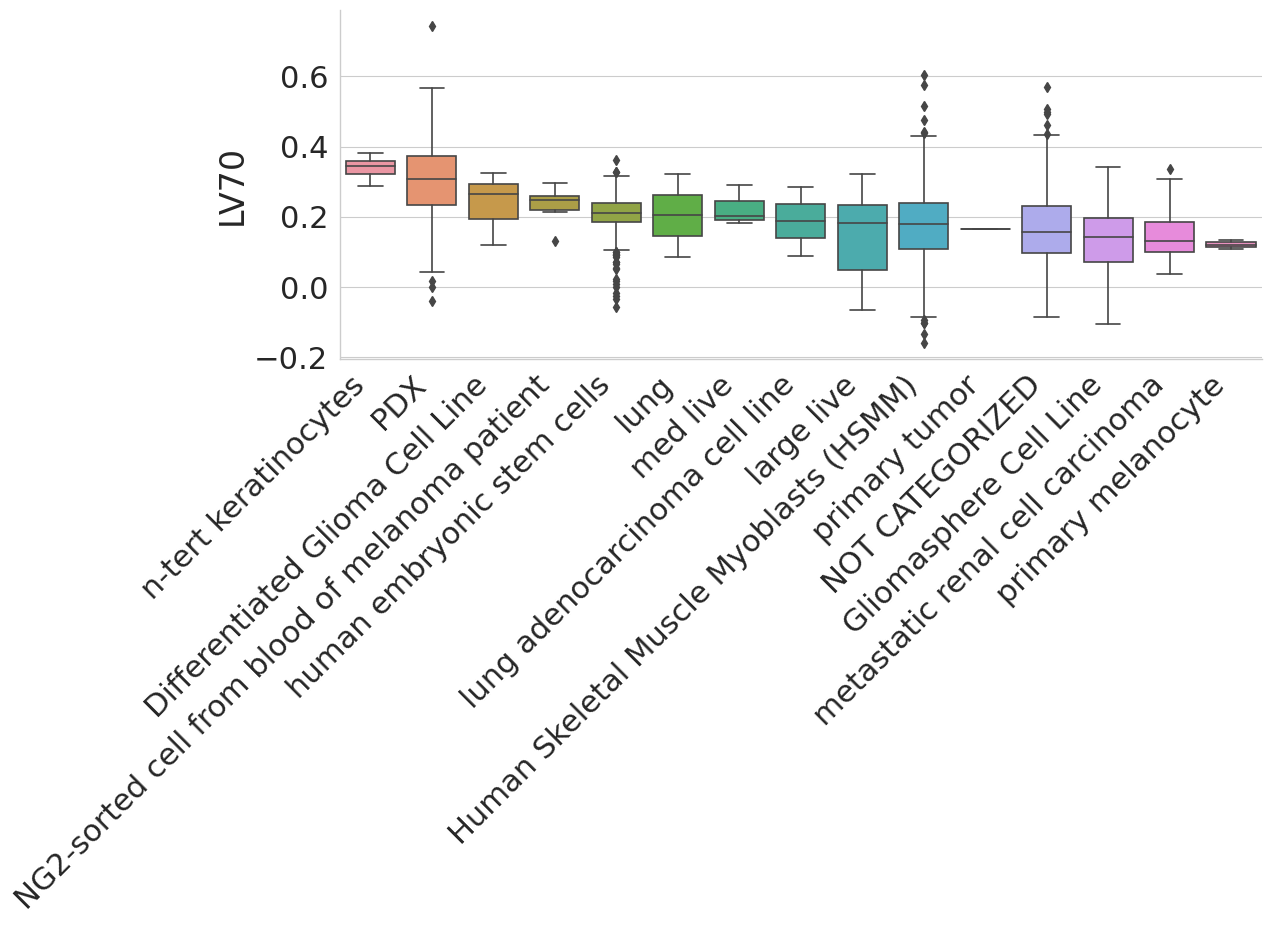

In [45]:
with sns.plotting_context("paper", font_scale=2.5), sns.axes_style("whitegrid"):
    g = sns.catplot(
        data=final_plot_data,
        y=LV_NAME,
        x=SELECTED_ATTRIBUTE,
        order=attr_order,
        kind="box",
        height=5,
        aspect=2.5,
    )
    plt.xticks(rotation=45, horizontalalignment="right")
    plt.xlabel("")

    # plt.savefig(
    #     OUTPUT_CELL_TYPE_FILEPATH,
    #     bbox_inches="tight",
    #     facecolor="white",
    # )

# Debug

In [46]:
with pd.option_context(
    "display.max_rows", None, "display.max_columns", None, "display.max_colwidth", None
):
    _tmp = final_plot_data[final_plot_data[SELECTED_ATTRIBUTE].str.contains("NOT CAT")]
    display(_tmp.head(20))

cell type      LV70
project   run                                 
SRP002605 SRR057511  NOT CATEGORIZED  0.245973
          SRR057512  NOT CATEGORIZED  0.248653
          SRR057513  NOT CATEGORIZED  0.050971
          SRR057514  NOT CATEGORIZED  0.058327
          SRR057515  NOT CATEGORIZED  0.050779
          SRR057516  NOT CATEGORIZED  0.263434
          SRR057517  NOT CATEGORIZED  0.265897
          SRR057518  NOT CATEGORIZED  0.071240
          SRR057519  NOT CATEGORIZED  0.066106
          SRR057520  NOT CATEGORIZED  0.066938
          SRR057521  NOT CATEGORIZED  0.316889
          SRR057522  NOT CATEGORIZED  0.314312
          SRR057523  NOT CATEGORIZED  0.100556
          SRR057524  NOT CATEGORIZED  0.093403
          SRR057525  NOT CATEGORIZED  0.088059
          SRR057526  NOT CATEGORIZED  0.284006
          SRR057527  NOT CATEGORIZED  0.074038
          SRR057528  NOT CATEGORIZED  0.075477
          SRR057529  NOT CATEGORIZED  0.288581
          SRR057530  NOT CATEGORIZED  0.084304

In [47]:
# what is there in these projects?
_tmp = (
    lv_data.loc[["SRP002605"]]
    .dropna(how="all", axis=1)
    .sort_values(LV_NAME, ascending=False)
)

display(_tmp.head(60))

transfection  time      LV70
project   run                                      
SRP002605 SRR057521    miR-1 duplex  32hr  0.316889
          SRR057522    miR-1 duplex  32hr  0.314312
          SRR057532    miR-1 duplex  12hr  0.308023
          SRR057529  miR-155 duplex  12hr  0.288581
          SRR057526            mock  12hr  0.284006
          SRR057517  miR-155 duplex  32hr  0.265897
          SRR057516  miR-155 duplex  32hr  0.263434
          SRR057512            mock  32hr  0.248653
          SRR057511            mock  32hr  0.245973
          SRR057523    miR-1 duplex  32hr  0.100556
          SRR057524    miR-1 duplex  32hr  0.093403
          SRR057525    miR-1 duplex  32hr  0.088059
          SRR057533    miR-1 duplex  12hr  0.086971
          SRR057530  miR-155 duplex  12hr  0.084304
          SRR057534    miR-1 duplex  12hr  0.079998
          SRR057528            mock  12hr  0.075477
          SRR057531  miR-155 duplex  12hr  0.074603
          SRR057527            mock  12hr  0.074038
          SRR057518  miR-155 duplex  32hr  0.071240
          SRR057520  miR-155 duplex  32hr  0.066938
          SRR057519  miR-155 duplex  32hr  0.066106
          SRR057514            mock  32hr  0.058327
          SRR057513            mock  32hr  0.050971
          SRR057515            mock  32hr  0.050779

# Reduced plot

## Data stats

In [ ]:
plot_data_stats = final_plot_data.describe()[LV_NAME]
display(plot_data_stats)

In [ ]:
plot_data_stats_by_cell_type = (
    final_plot_data.groupby(SELECTED_ATTRIBUTE)
    .describe()[LV_NAME]
    .sort_values("50%", ascending=False)
)
display(plot_data_stats_by_cell_type)

In [ ]:
# keep cell types whose median is larger than the global median
selected_cell_types = plot_data_stats_by_cell_type[
    (plot_data_stats_by_cell_type["50%"] > max(plot_data_stats.loc["50%"], 0.0))
].index
display(selected_cell_types)

In [ ]:
final_plot_data.shape

In [ ]:
final_plot_data = final_plot_data[
    final_plot_data[SELECTED_ATTRIBUTE].isin(selected_cell_types)
]

In [ ]:
final_plot_data.shape

## Set x-axis order

In [ ]:
attr_order = (
    final_plot_data.groupby(SELECTED_ATTRIBUTE)
    .median()
    .sort_values(LV_NAME, ascending=False)
    .index[:N_TOP_ATTRS]
    .tolist()
)

In [ ]:
len(attr_order)

In [ ]:
attr_order[:5]

## Plot

In [ ]:
with sns.plotting_context("paper", font_scale=2.5), sns.axes_style("whitegrid"):
    g = sns.catplot(
        data=final_plot_data,
        y=LV_NAME,
        x=SELECTED_ATTRIBUTE,
        order=attr_order,
        kind="box",
        height=5,
        aspect=2.5,
    )
    plt.xticks(rotation=45, horizontalalignment="right")
    plt.xlabel("")

    # plt.savefig(
    #     OUTPUT_CELL_TYPE_FILEPATH,
    #     bbox_inches="tight",
    #     facecolor="white",
    # )